In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  # 线性回归
from sklearn.model_selection import train_test_split  # 这里是引用了交叉验证

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.family'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

In [2]:
%store -r samples_data
# cluster 1st
%store -r model_features_1st
%store -r produc_features_1st
%store -r weight_1st
# cluster 2nd
%store -r model_features_2nd
%store -r produc_features_2nd
%store -r weight_2nd

In [3]:
if ('时间', 'Unnamed: 1_level_1') in model_features_1st.keys():
    del model_features_1st[('时间', 'Unnamed: 1_level_1')]
model_features_1st.head(n=5)

S-ZORB.TC_2101.PV S-ZORB.HIC_2533.AUTOMANA.OP S-ZORB.BS_AT_2401.PV  \
               反吹氢气温度                   HV2533手操器              闭锁料斗烃含量   
324          0.529498                    0.492738            -0.084279   
323          0.515957                    0.492738            -0.148180   
322          0.544970                    0.492738            -0.117860   
321          0.532671                    0.492738            -0.196347   
320          0.539482                    0.492738            -0.141963   

    S-ZORB.CAL.LINE.PV S-ZORB.FC_2702.DACA S-ZORB.FT_1204.DACA.PV  \
                 反应器线速        D-110底流化N2流量            D-121含硫污水排量   
324           0.319359           -0.320209              -2.431707   
323           0.328913           -0.290392               0.535568   
322           0.247400           -0.274841               0.122351   
321           0.282542           -0.575144               1.295371   
320           0.249137           -0.701645               0.125690   

    S-ZORB.PDT_2104.PV S-ZORB.LC_5002.DACA S-ZORB.TE_2608.DACA  \
               反应器顶底压差             D-202液位         R-102底部锥段温度   
324          -1.188444            0.494804            0.377634   
323          -1.316514            0.495621            0.374871   
322          -1.398743            0.490412            0.397651   
321          -1.422260            0.480492            0.094952   
320          -1.540949            0.487337            0.169353   

    S-ZORB.AT_1001.PV S-ZORB.PDI_2102.PV      原料性质            
             进装置原料硫含量            反应过滤器压差    辛烷值RON  硫含量,μg/g  
324         -0.626294          -1.062409 -0.450083  0.185228  
323         -0.397364          -1.004263 -1.334342  0.185228  
322         -0.321819          -1.047596 -1.334342  0.292148  
321         -0.149718          -1.082631 -1.688045  0.292148  
320         -0.133473          -1.136832 -1.688045  0.292148

In [4]:
if ('时间', 'Unnamed: 1_level_1') in model_features_2nd.keys():
    del model_features_2nd[('时间', 'Unnamed: 1_level_1')]
model_features_2nd.head(n=5)

S-ZORB.FT_1301.DACA S-ZORB.BS_AT_2401.PV S-ZORB.TE_7504.DACA  \
     K-103出口去K-101出口管流量              闭锁料斗烃含量          K-102A排气温度   
302            0.085419             0.225508            0.121816   
291           -0.589309             0.389010            0.121816   
290           -1.197798             0.779403            0.121816   
289           -1.159246             0.882837            0.121816   
288           -0.314579             0.787034            0.121816   

    S-ZORB.PDI_2903.DACA S-ZORB.TE_5101.DACA S-ZORB.PT_7510B.DACA  \
             ME-103进出口差压         A-201出口总管温度           K-103B排气压力   
302             1.593688            1.065327            -0.329904   
291             1.525046           -1.081067            -0.328715   
290             2.035974            0.471438            -0.328122   
289             1.844095            0.148086            -0.327222   
288             1.134681            0.576191            -0.235142   

    S-ZORB.PT_7107B.DACA S-ZORB.AT-0001.DACA.PV S-ZORB.FT_9302.PV  \
              K-101B排气压力         S_ZORB AT-0001    0.3MPa凝结水出装置流量   
302             0.490353              -0.931222         -0.828226   
291             0.506536              -0.929116         -1.233332   
290             0.507433              -0.932145         -0.830512   
289             0.510304              -0.928506         -0.873408   
288             0.507059              -0.928163         -0.785302   

    S-ZORB.PDT_2906.DACA  ... S-ZORB.FT_1503.DACA.PV  \
             ME-108过滤器差压  ...      8.0MPa氢气至循环氢压缩机入口   
302            -0.445144  ...              -0.154887   
291             0.073317  ...              -0.643312   
290             0.020085  ...              -1.248209   
289            -0.015403  ...              -1.116430   
288            -0.050890  ...              -0.357481   

    S-ZORB.FT_1006.TOTALIZERA.PV S-ZORB.SIS_TE_6010.PV S-ZORB.FT_2302.DACA  \
                 加氢裂化轻石脑油进装置累积流量             加热炉排烟出口温度      D-105上跨接线松动风流量   
302                     0.883624             -0.514636           -0.145123   
291                     1.010270             -0.673447           -0.331054   
290                     1.026615             -0.209301           -0.315216   
289                     1.037759             -0.119229           -0.295519   
288                     1.048604              0.035344           -0.298634   

    S-ZORB.FT_1504.DACA.PV S-ZORB.TE_2501.DACA S-ZORB.PDT_2104.PV  \
         8.0MPa氢气至反吹氢压缩机出口             D-107温度            反应器顶底压差   
302               0.025605            0.305877          -1.177852   
291               0.828936            0.939619          -1.227667   
290               0.831862            0.980570          -1.463284   
289               0.852069            1.003097          -1.560933   
288               0.355043            1.474103          -1.584177   

    S-ZORB.TE_9002.DACA      原料性质            
           D-203顶部出口管温度    辛烷值RON  硫含量,μg/g  
302            1.407452  1.538911  1.123836  
291            0.757758 -0.461673 -1.134292  
290            1.401998  0.126734 -1.134292  
289            1.316219  0.009052 -1.134292  
288            1.455596  0.009052 -1.671040  

[5 rows x 24 columns]

## 对于 类别-1 进行线性回归建模

In [5]:
# 构建训练集和测试集 cluster 1st
X = model_features_1st
y = produc_features_1st[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, shuffle=False)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(132, 13)
y_train.shape=(132, 1)
X_test.shape=(57, 13)
y_test.shape=(57, 1)


In [6]:
# 简单线性回归
# Applying LinearRegression
model_1st = LinearRegression()
model_1st.fit(X_train, y_train)
y_train_pred = model_1st.predict(X_train)
y_test_pred = model_1st.predict(X_test)
y_pred = model_1st.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.923, test:1.260, whole:1.025
R^2 train:0.131, test:-0.519, whole:-0.025


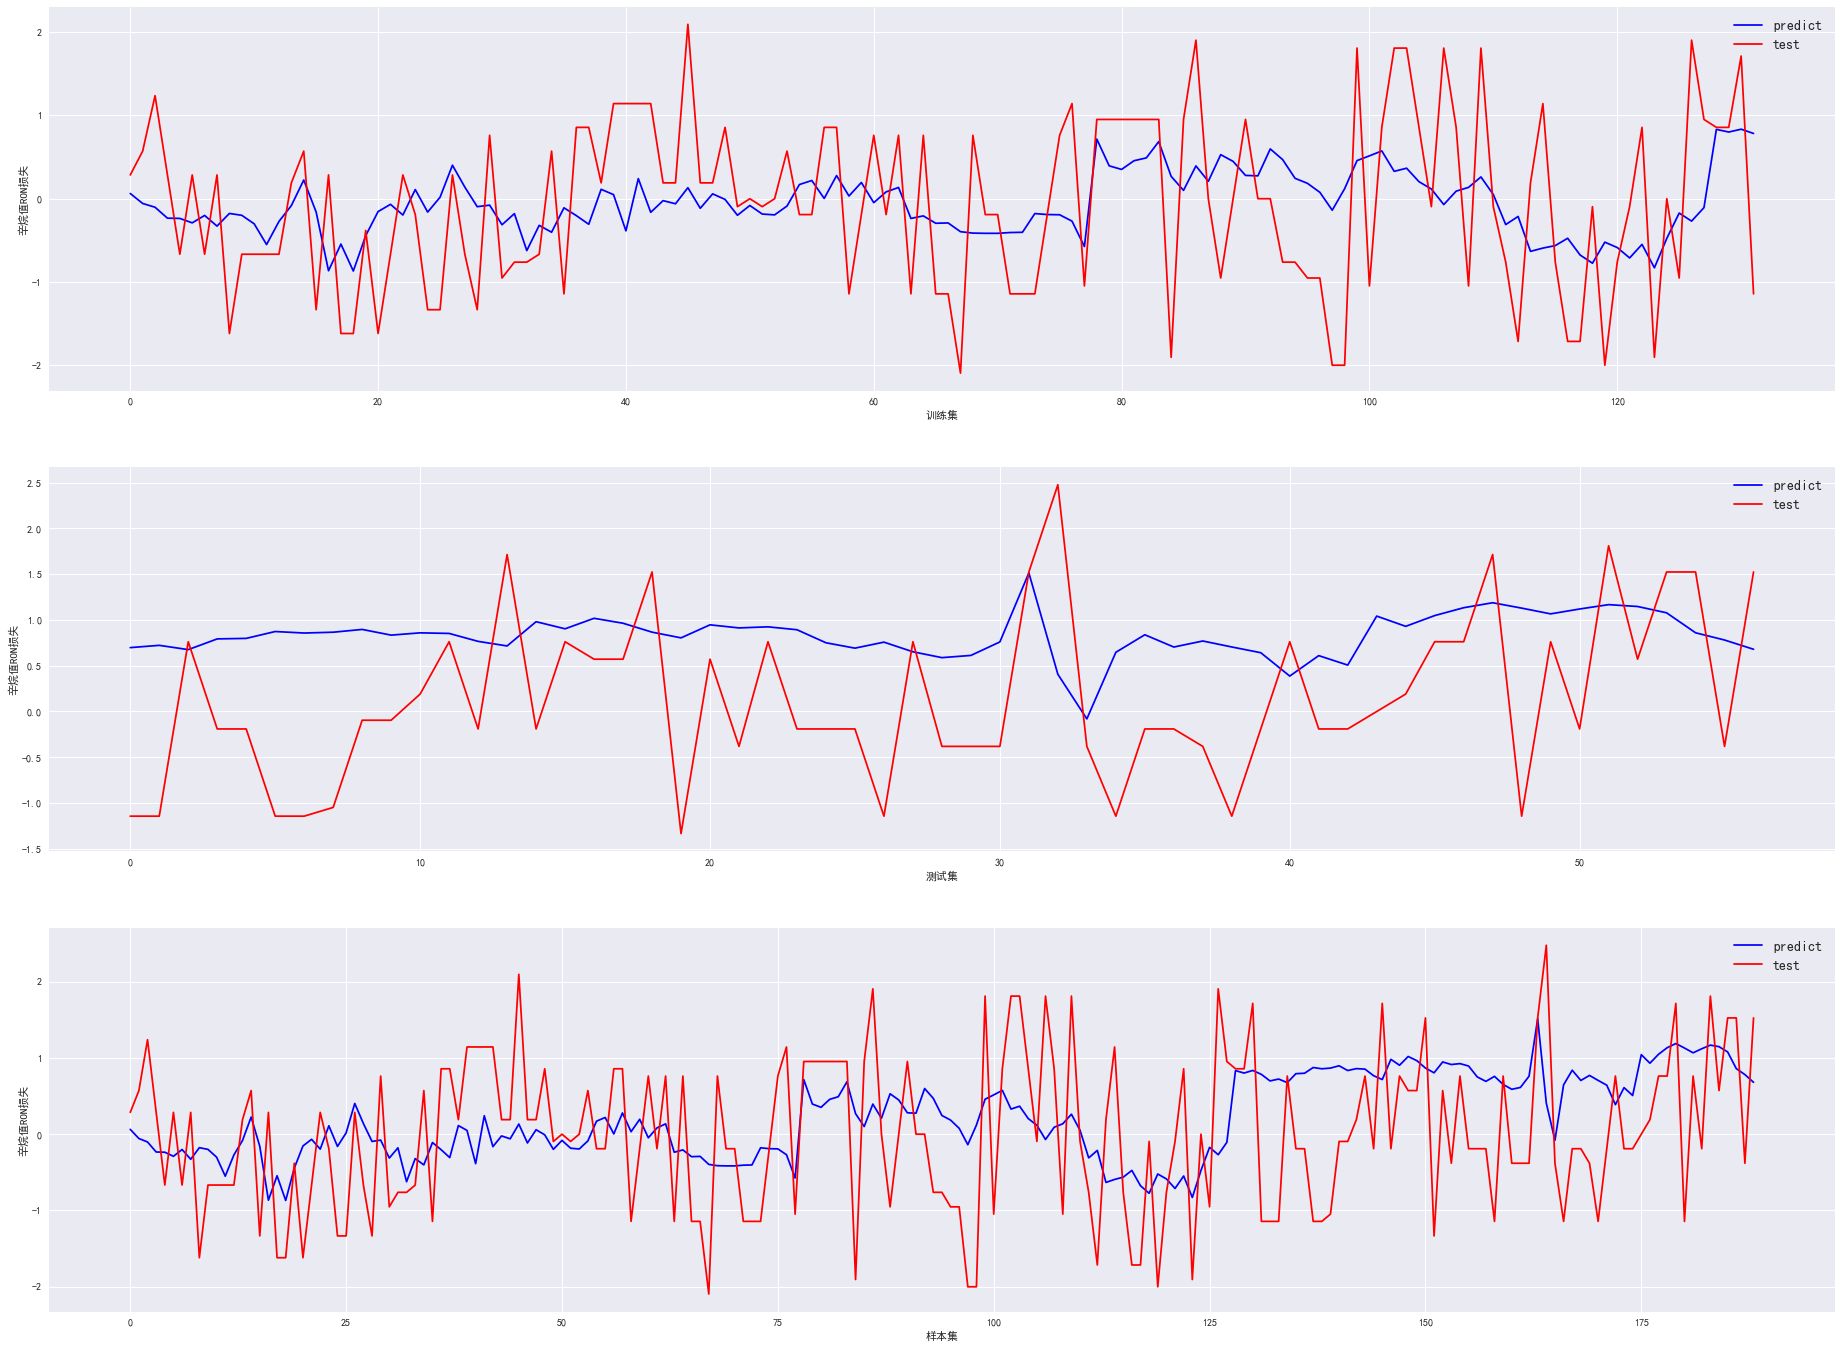

In [7]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 对于 类别-2 进行线性回归建模

In [8]:
# 构建训练集和测试集 cluster 2nd
X = model_features_2nd
y = produc_features_2nd[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, shuffle=False)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(81, 24)
y_train.shape=(81, 1)
X_test.shape=(36, 24)
y_test.shape=(36, 1)


In [9]:
# 简单线性回归
# Applying LinearRegression
model_2nd = LinearRegression()
model_2nd.fit(X_train, y_train)
y_train_pred = model_2nd.predict(X_train)
y_test_pred = model_2nd.predict(X_test)
y_pred = model_2nd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.549, test:0.664, whole:0.584
R^2 train:0.547, test:-0.431, whole:0.416


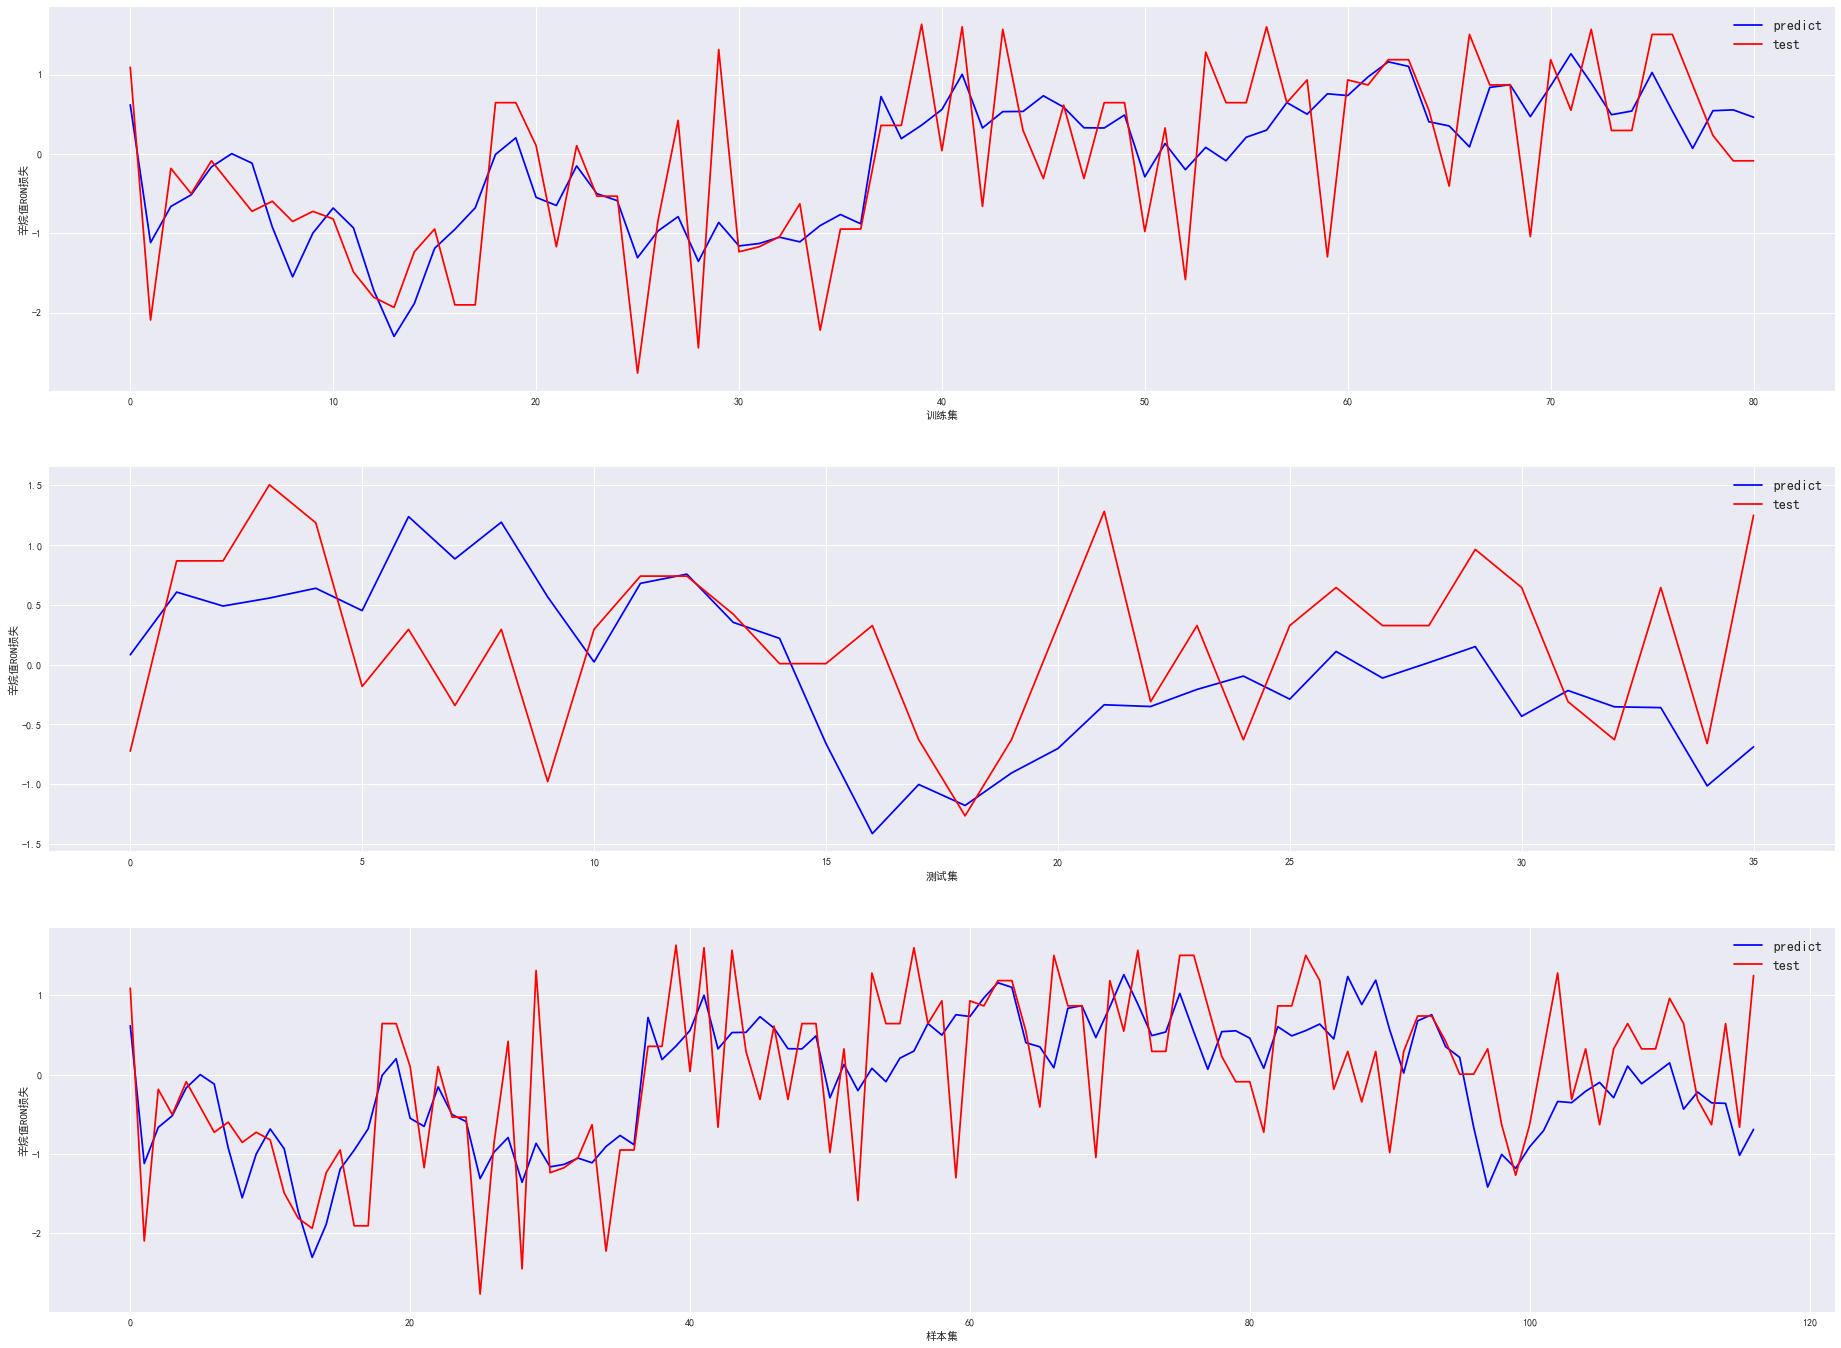

In [10]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择各聚类的模型的特征的并集

In [11]:
X = samples_data[list(set(model_features_1st.keys()).union(set(model_features_2nd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, shuffle=False)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(227, 33)
y_train.shape=(227, 1)
X_test.shape=(98, 33)
y_test.shape=(98, 1)


In [12]:
# 简单线性回归
# Applying LinearRegression
model_3rd = LinearRegression()
model_3rd.fit(X_train, y_train)
y_train_pred = model_3rd.predict(X_train)
y_test_pred = model_3rd.predict(X_test)
y_pred = model_3rd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.044, test:31035.708, whole:9358.491
R^2 train:0.282, test:-1607930.575, whole:-183970.452


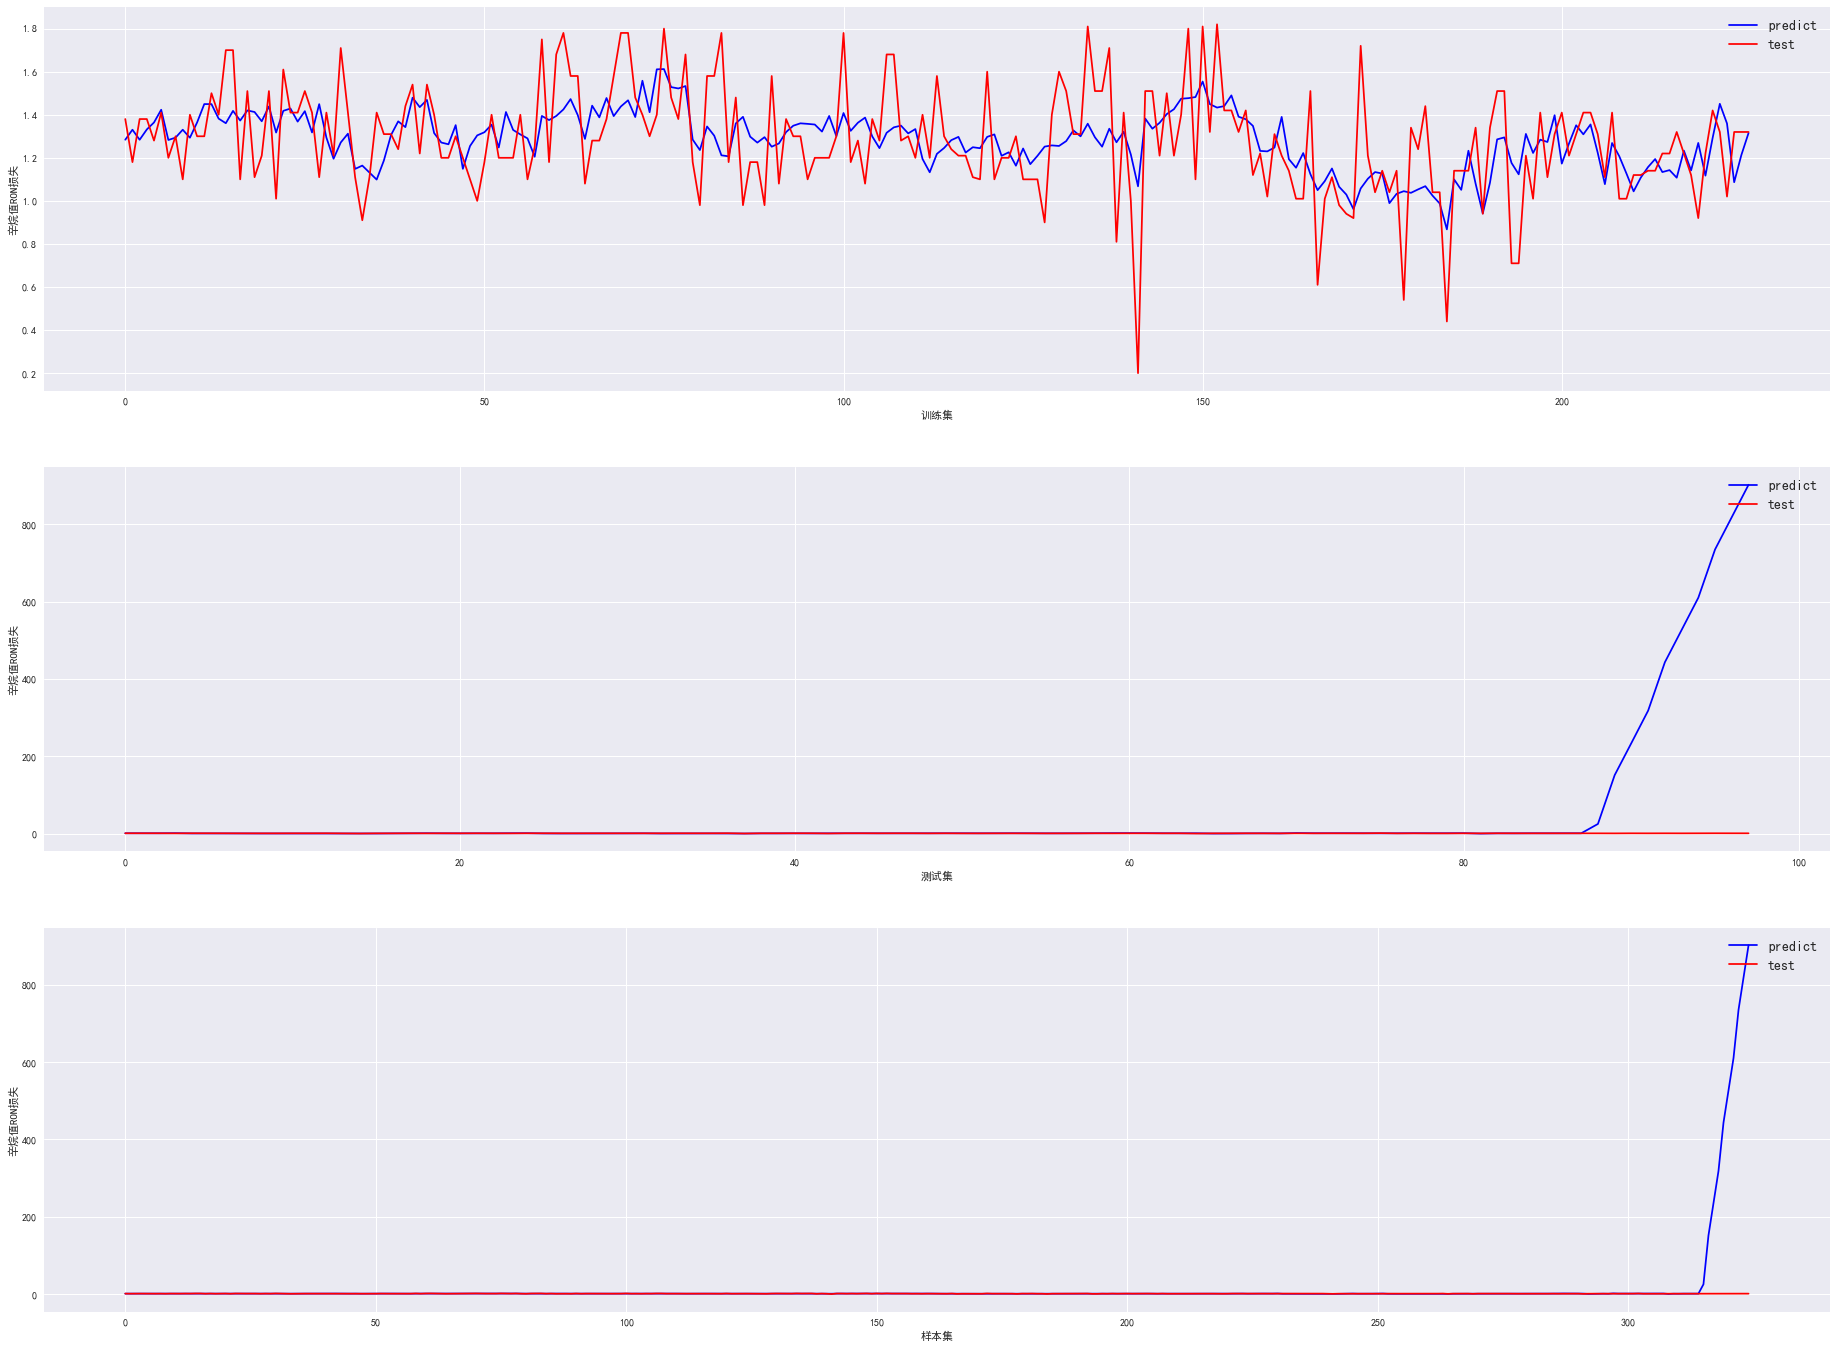

In [13]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择各聚类线性模型的特征的交集

In [14]:
X = samples_data[list(set(model_features_1st.keys()).intersection(set(model_features_2nd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, shuffle=False)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(227, 4)
y_train.shape=(227, 1)
X_test.shape=(98, 4)
y_test.shape=(98, 1)


In [15]:
# 简单线性回归
# Applying LinearRegression
model_4th = LinearRegression()
model_4th.fit(X_train, y_train)
y_train_pred = model_4th.predict(X_train)
y_test_pred = model_4th.predict(X_test)
y_pred = model_4th.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.056, test:0.085, whole:0.065
R^2 train:0.098, test:-3.425, whole:-0.270


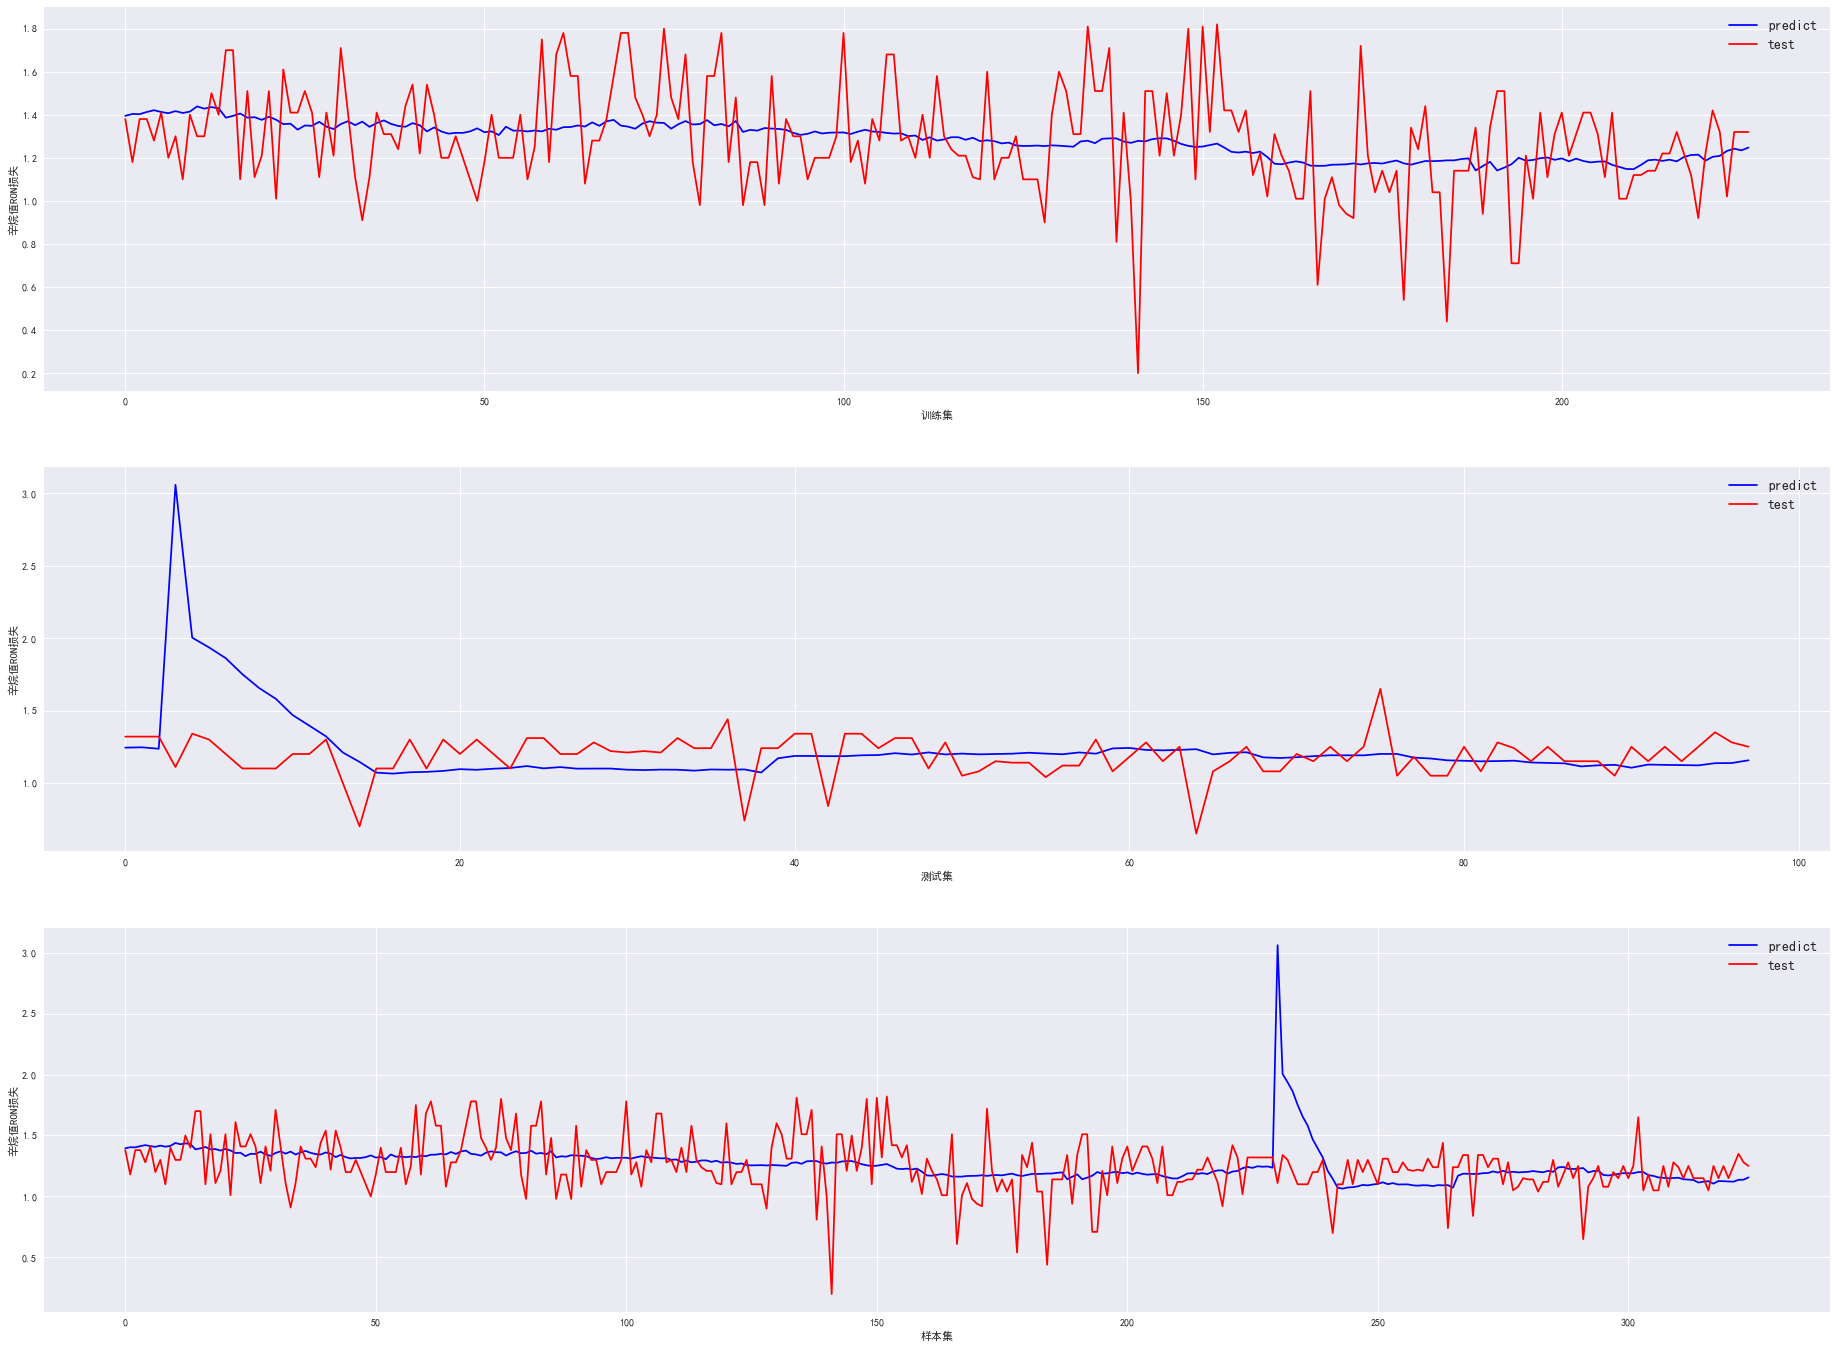

In [16]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()